In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras


matplotlib.rcParams["figure.figsize"] = (16, 8)
plt = matplotlib.pyplot

In [ ]:
df = pd.read_csv("train.csv")
df.dropna(inplace=True)

In [ ]:
(imdb_X_train, imdb_y_train), (imdb_X_test, imdb_y_test) = keras.datasets.imdb.load_data(num_words=20000)
imdb_index = keras.datasets.imdb.get_word_index()
inverted_imdb_index = dict((i, word) for (word, i) in imdb_index.items())

(news_X_train, news_y_train), (news_X_test, news_y_test) = keras.datasets.reuters.load_data(num_words=5000)
news_index = keras.datasets.reuters.get_word_index()
inverted_news_index = dict((i, word) for (word, i) in news_index.items())

tw_X_train, tw_X_test, tw_y_train, tw_y_test = train_test_split(df.iloc[:,1].values, df.iloc[:,-1].apply(lambda x: {"negative":0, "neutral":1, "positive":2}[x]).values, train_size=0.7)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    document_count=0
)

tokenizer.fit_on_texts(tw_X_train)
tw_X_train = tokenizer.texts_to_sequences(tw_X_train)
tw_X_test = tokenizer.texts_to_sequences(tw_X_test)

In [ ]:
" ".join(inverted_imdb_index[i] for i in imdb_X_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit the

In [ ]:
" ".join(inverted_news_index[i] for i in news_X_train[1])

'the termination payment airport takes 6 of of 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs'

In [ ]:
np.unique(imdb_y_test), np.unique(news_y_test), np.unique(tw_y_test), 

(array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([0, 1, 2]))

In [ ]:
imdb_X_train = keras.preprocessing.sequence.pad_sequences(imdb_X_train, maxlen=200)
imdb_X_test = keras.preprocessing.sequence.pad_sequences(imdb_X_test, maxlen=200)

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(None,)),
    keras.layers.Embedding(20000, 128),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(imdb_X_train, imdb_y_train, epochs=3)

Epoch 1/3
782/782 [==============================] - 34s 40ms/step - loss: 0.4254 - accuracy: 0.8032
Epoch 2/3
782/782 [==============================] - 32s 40ms/step - loss: 0.2205 - accuracy: 0.9162
Epoch 3/3
782/782 [==============================] - 31s 40ms/step - loss: 0.1465 - accuracy: 0.9470


              precision    recall  f1-score   support

           0       0.83      0.89      0.86     12500
           1       0.88      0.81      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



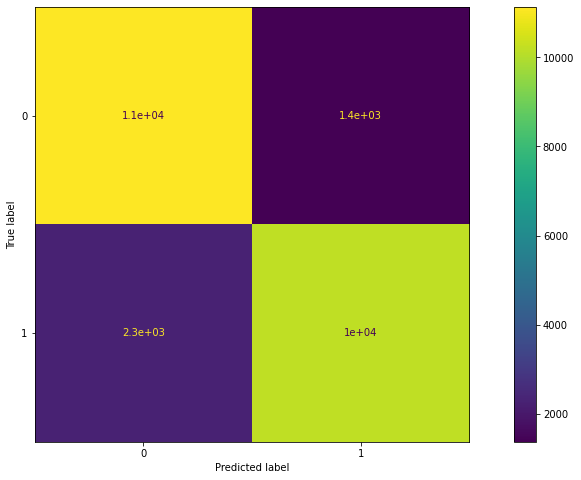

In [ ]:
imdb_preds = model.predict(imdb_X_test).round()
cm = confusion_matrix(imdb_y_test, imdb_preds)
print(classification_report(imdb_y_test, imdb_preds))
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

In [ ]:
news_X_train = keras.preprocessing.sequence.pad_sequences(news_X_train, maxlen=200)
news_X_test = keras.preprocessing.sequence.pad_sequences(news_X_test, maxlen=200)
news_y_train = keras.utils.to_categorical(news_y_train)

In [ ]:
news_y_train.shape

(8982, 46)

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(None,)),
    keras.layers.Embedding(5000, 128),
    keras.layers.LSTM(64),
    keras.layers.Dense(46, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(news_X_train, news_y_train, epochs=15)

Epoch 1/15
281/281 [==============================] - 8s 21ms/step - loss: 2.2180 - accuracy: 0.4530
Epoch 2/15
281/281 [==============================] - 6s 22ms/step - loss: 1.7366 - accuracy: 0.5682
Epoch 3/15
281/281 [==============================] - 6s 22ms/step - loss: 1.5242 - accuracy: 0.6155
Epoch 4/15
281/281 [==============================] - 6s 21ms/step - loss: 1.4104 - accuracy: 0.6487
Epoch 5/15
281/281 [==============================] - 6s 21ms/step - loss: 1.3724 - accuracy: 0.6514
Epoch 6/15
281/281 [==============================] - 6s 22ms/step - loss: 1.3041 - accuracy: 0.6680
Epoch 7/15
281/281 [==============================] - 6s 21ms/step - loss: 1.1066 - accuracy: 0.7114
Epoch 8/15
281/281 [==============================] - 6s 22ms/step - loss: 1.0457 - accuracy: 0.7253
Epoch 9/15
281/281 [==============================] - 6s 22ms/step - loss: 0.9612 - accuracy: 0.7528
Epoch 10/15
281/281 [==============================] - 6s 22ms/step - loss: 0.8794 - accura

In [ ]:
news_preds = model.predict(news_X_test).argmax(axis=1)
print(classification_report(news_y_test, news_preds))

              precision    recall  f1-score   support

           0       0.31      0.33      0.32        12
           1       0.61      0.65      0.63       105
           2       0.37      0.50      0.43        20
           3       0.91      0.91      0.91       813
           4       0.82      0.72      0.77       474
           5       0.00      0.00      0.00         5
           6       0.43      0.43      0.43        14
           7       0.00      0.00      0.00         3
           8       0.45      0.53      0.49        38
           9       0.43      0.40      0.42        25
          10       0.49      0.57      0.52        30
          11       0.47      0.54      0.50        83
          12       0.33      0.15      0.21        13
          13       0.23      0.54      0.32        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.37      0.53      0.44        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tw_X_train = keras.preprocessing.sequence.pad_sequences(tw_X_train, maxlen=200)
tw_X_test = keras.preprocessing.sequence.pad_sequences(tw_X_test, maxlen=200)

In [ ]:
tw_y_train = keras.utils.to_categorical(tw_y_train)

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(None,)),
    keras.layers.Embedding(23000, 128),
    keras.layers.LSTM(64),
    keras.layers.Dense(3, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(tw_X_train, tw_y_train, epochs=5)

Epoch 1/5
602/602 [==============================] - 28s 44ms/step - loss: 0.8140 - accuracy: 0.6278
Epoch 2/5
602/602 [==============================] - 26s 44ms/step - loss: 0.5136 - accuracy: 0.7978
Epoch 3/5
602/602 [==============================] - 27s 45ms/step - loss: 0.3321 - accuracy: 0.8782
Epoch 4/5
602/602 [==============================] - 27s 44ms/step - loss: 0.2240 - accuracy: 0.9212
Epoch 5/5
602/602 [==============================] - 26s 43ms/step - loss: 0.1584 - accuracy: 0.9455


              precision    recall  f1-score   support

           0       0.71      0.62      0.66      2295
           1       0.66      0.66      0.66      3353
           2       0.71      0.79      0.75      2596

    accuracy                           0.69      8244
   macro avg       0.69      0.69      0.69      8244
weighted avg       0.69      0.69      0.69      8244



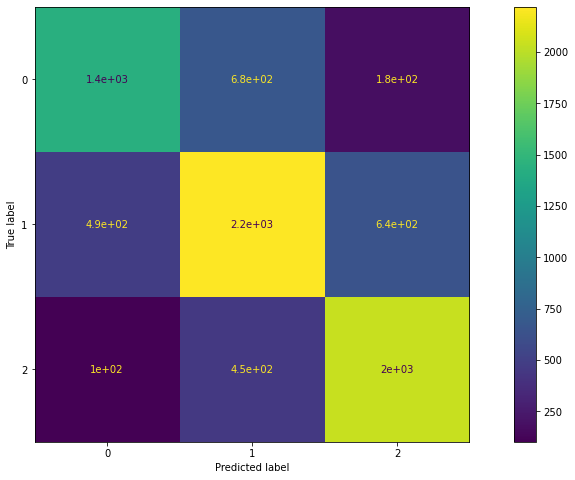

In [ ]:
tw_preds = model.predict(tw_X_test).argmax(axis=1)
cm = confusion_matrix(tw_y_test, tw_preds)
print(classification_report(tw_y_test, tw_preds))
ConfusionMatrixDisplay(cm, display_labels=[0,1,2]).plot()